# My Google Colab Version of this project, Because Jupyter works bad.
https://colab.research.google.com/drive/1drM_9KTRdQnrd0EjHMawFx1bTk5pFrAI?usp=sharing

## Data Collecting / Cleaning

In [ ]:
%pip install sklearn
%pip install geopy
%pip install pgeocode
%pip install scipy
%pip install seaborn
%pip install plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
import plotly.express as px
import scipy
sns.set()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=895abc85917459edec6d958573e6bc777d9d71226a54c2c261364237170bf8da
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading dataset.

def load_dataset():
    df = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')
    return df


visa_df = load_dataset()

In [ ]:
# Make summarize to our dataset.

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())


print_summarize_dataset(visa_df)

Dataset dimension:
(5000, 14)
First 10 rows of dataset:
   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   
5   6   37          13      29     92121       4    0.4          2       155   
6   7   53          27      72     91711       2    1.5          2         0   
7   8   50          24      22     93943       1    0.3          3         0   
8   9   35          10      81     90089       3    0.6          2       104   
9  10   34           9     180     93023       1    8.9          3         0   

   Personal Loan  Securities Account  CD Account  Online  Credi

In [ ]:
# Let's get more information.

visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Check dataset for missing(NaN) values.

visa_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
visa_df

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# Data Exploration and Visualization

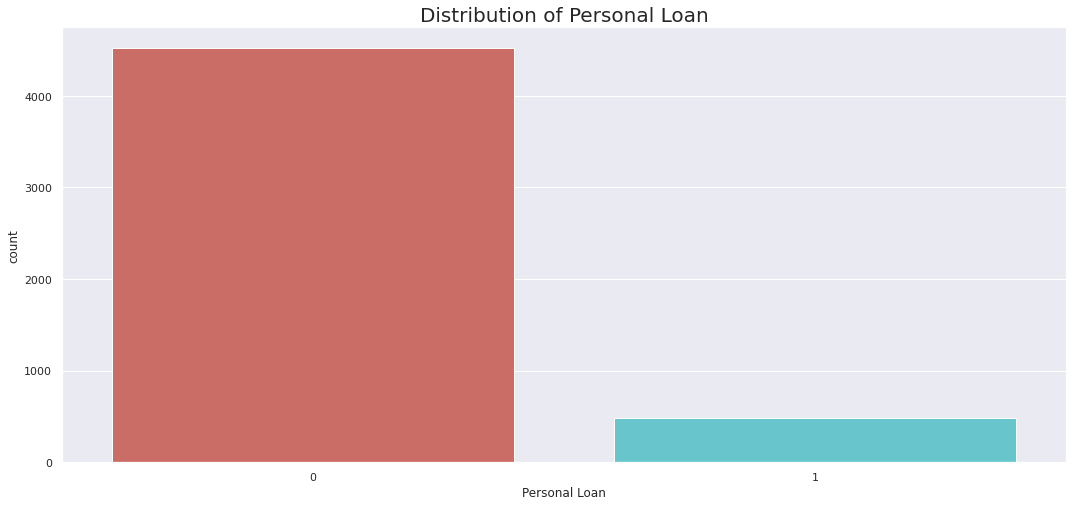

In [ ]:
def per_loan(df):
    plt.figure(figsize = (18, 8))
    plt.title('Distribution of Personal Loan', fontsize = 20)
    sns.countplot(x="Personal Loan", data=df, palette="hls")
    plt.show()


per_loan(visa_df)

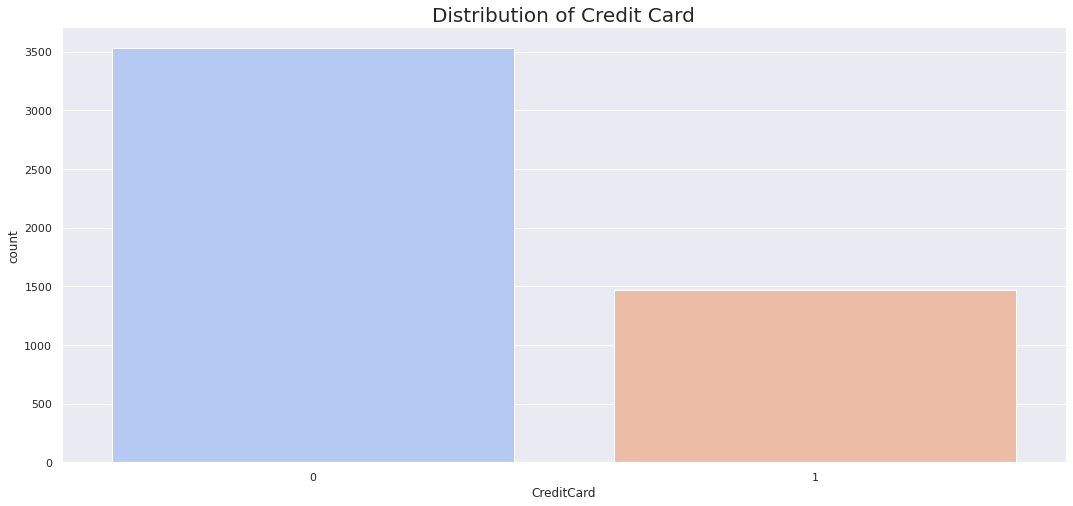

In [ ]:
def credcard(df):
    plt.figure(figsize = (18, 8))
    plt.title('Distribution of Credit Card', fontsize = 20)
    sns.countplot(x="CreditCard", data=df, palette="coolwarm")
    plt.show()


credcard(visa_df)

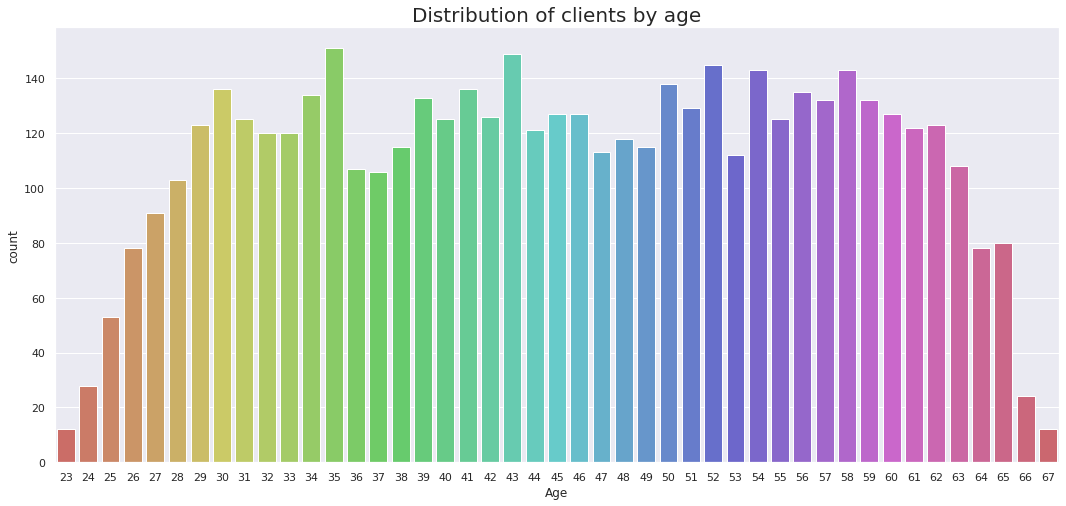

In [ ]:
def show_age(df):
    plt.figure(figsize = (18, 8))
    plt.title('Distribution of clients by age', fontsize = 20)
    plt.xlabel('Age')
    sns.countplot(x="Age", data=df, palette="hls")
    plt.show()


show_age(visa_df)

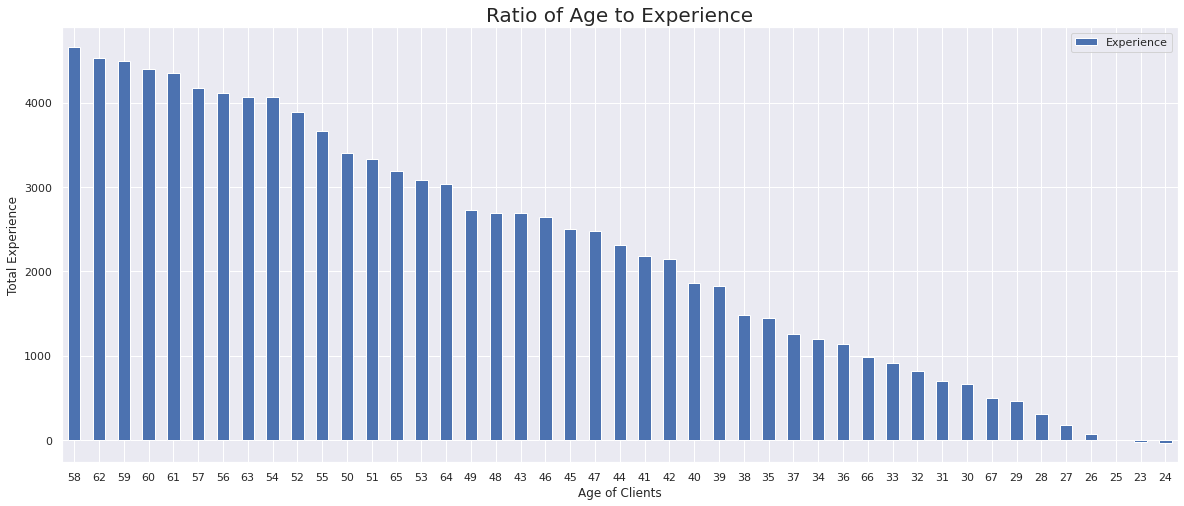

In [ ]:
def age_to_experience(df):
    f = visa_df.groupby('Age')[['Experience']].sum().sort_values(by='Experience', ascending=False)
    f.plot(kind="bar", figsize=(20,8))
    plt.title("Ratio of Age to Experience", fontsize = 20)
    plt.xlabel("Age of Clients")
    plt.xticks(rotation=0)
    plt.ylabel("Total Experience")
    plt.show()


age_to_experience(visa_df)

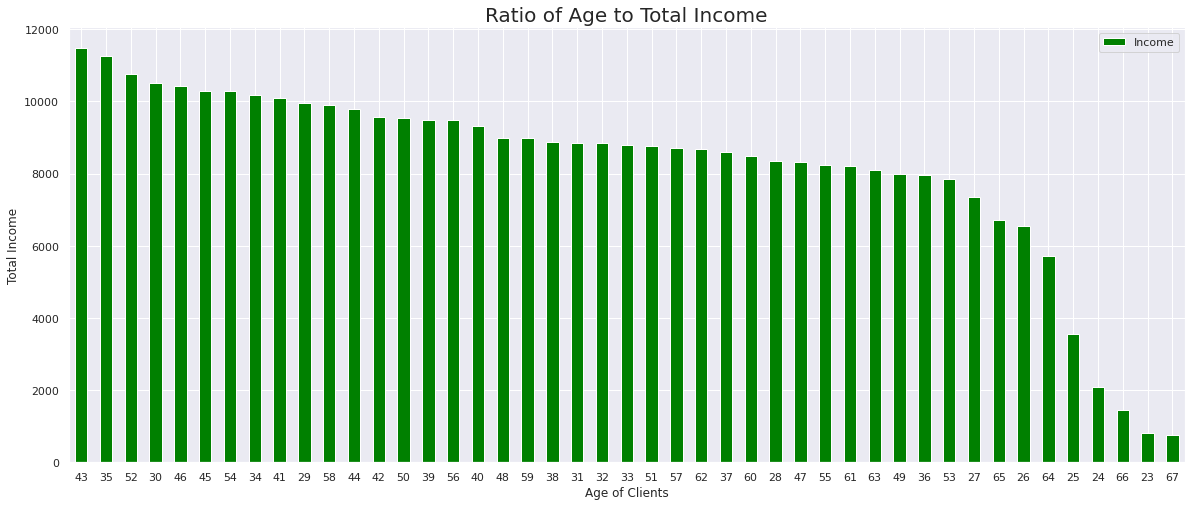

In [ ]:
def age_to_income(df):
    f = visa_df.groupby('Age')[['Income']].sum().sort_values(by='Income', ascending=False)
    f.plot(kind="bar", figsize=(20,8), color='green')
    plt.title("Ratio of Age to Total Income", fontsize = 20)
    plt.xlabel("Age of Clients")
    plt.xticks(rotation=0)
    plt.ylabel("Total Income")
    plt.show()


age_to_income(visa_df)

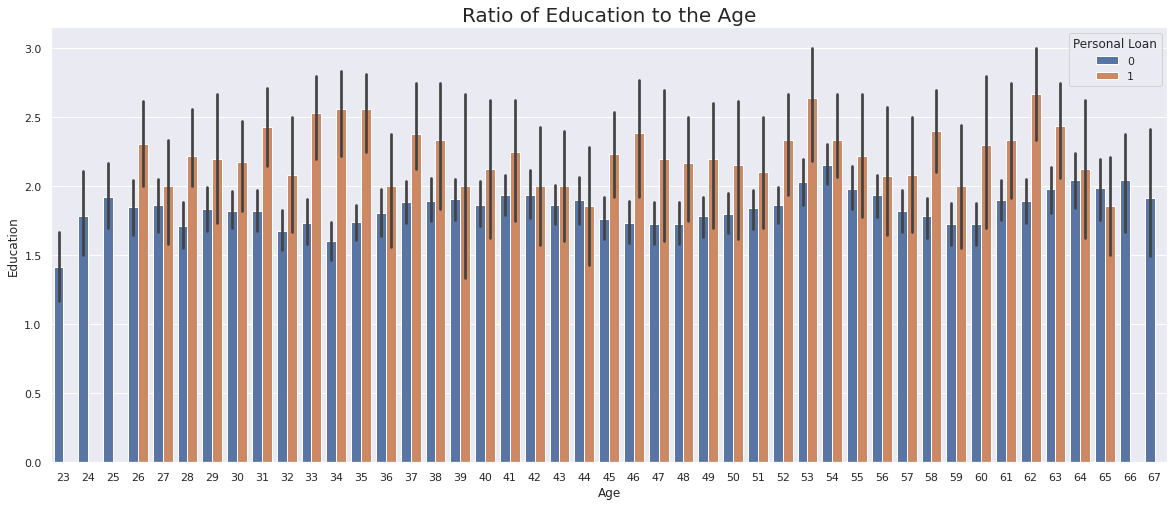

In [ ]:
def age_to_education(df): 
    plt.figure(figsize=(20, 8))
    plt.title("Ratio of Education to the Age", fontsize = 20)
    sns.barplot(x='Age', y='Education', hue="Personal Loan", data=visa_df)


age_to_education(visa_df)

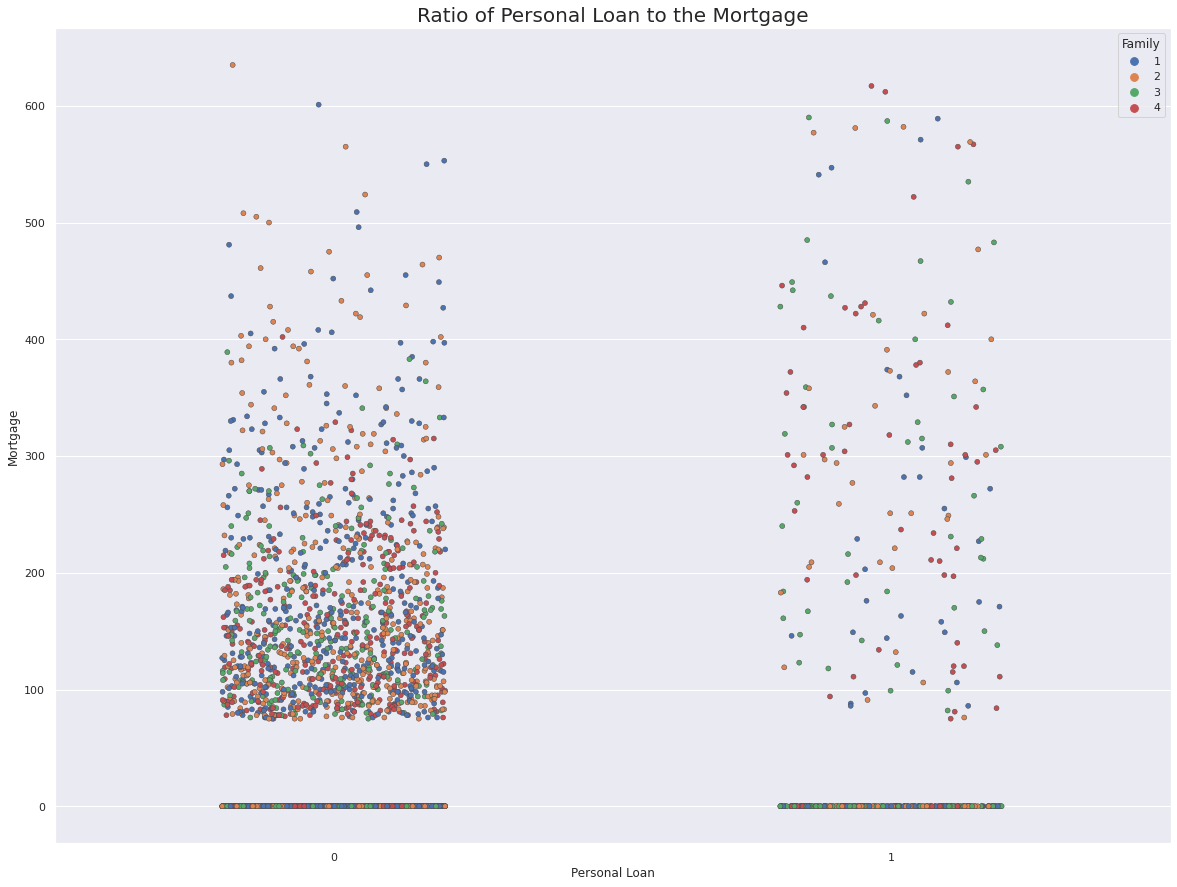

In [ ]:
def personalloan_to_mortgage(df):
    plt.figure(figsize=(20, 15))
    plt.title("Ratio of Personal Loan to the Mortgage", fontsize = 20)
    sns.stripplot(data=df, y='Mortgage', x='Personal Loan', hue='Family', jitter=.2, linewidth=.5)


personalloan_to_mortgage(visa_df)

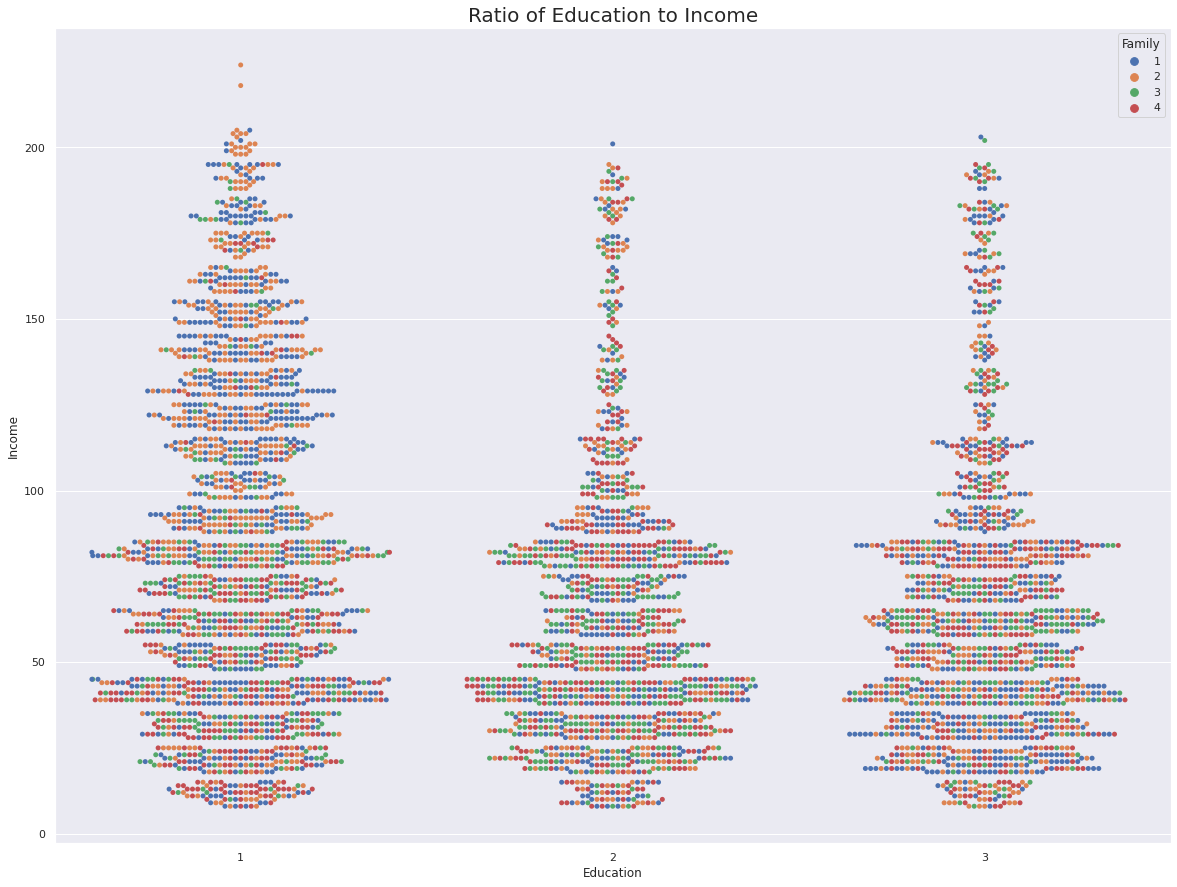

In [ ]:
def education_to_income(df):
    plt.figure(figsize=(20, 15))
    plt.title("Ratio of Education to Income", fontsize = 20)
    sns.swarmplot(data=df, y='Income', x='Education', hue='Family')


education_to_income(visa_df)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


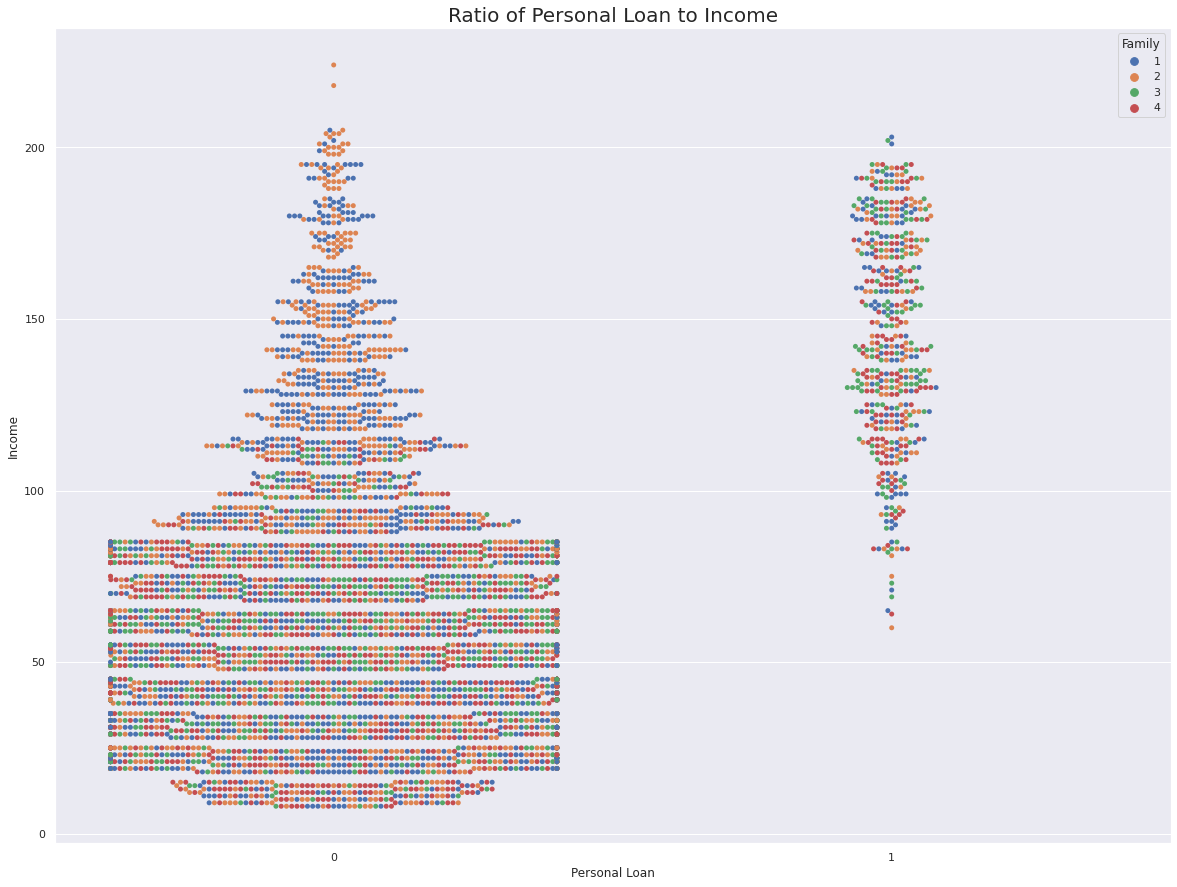

In [ ]:
def education_to_income(df):
    plt.figure(figsize=(20, 15))
    plt.title("Ratio of Personal Loan to Income", fontsize = 20)
    sns.swarmplot(data=df, y='Income', x='Personal Loan', hue='Family')


education_to_income(visa_df)

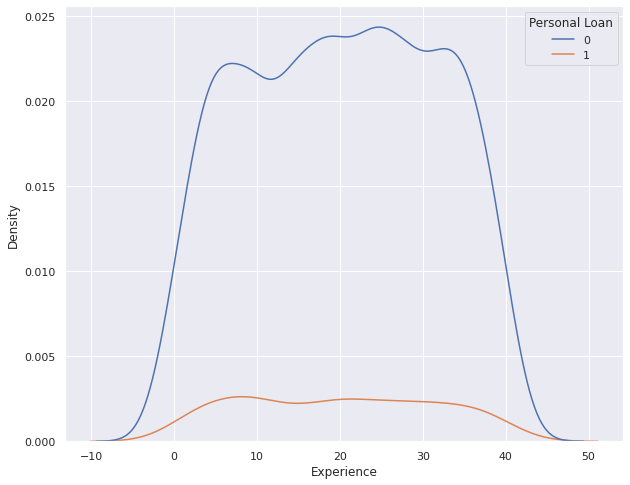

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=visa_df, x='Experience', hue='Personal Loan')

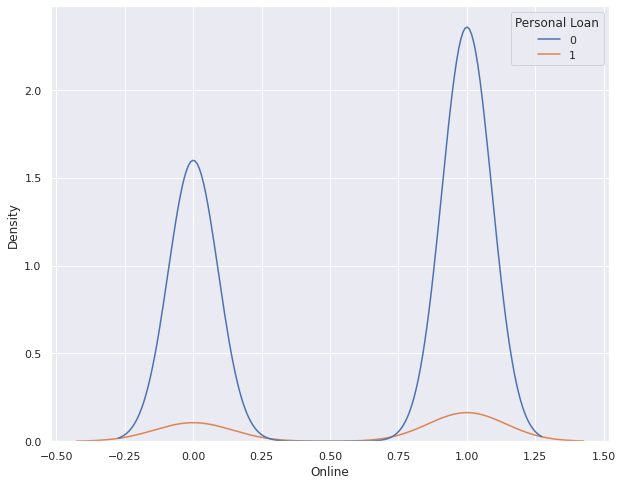

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=visa_df, x='Online', hue='Personal Loan')

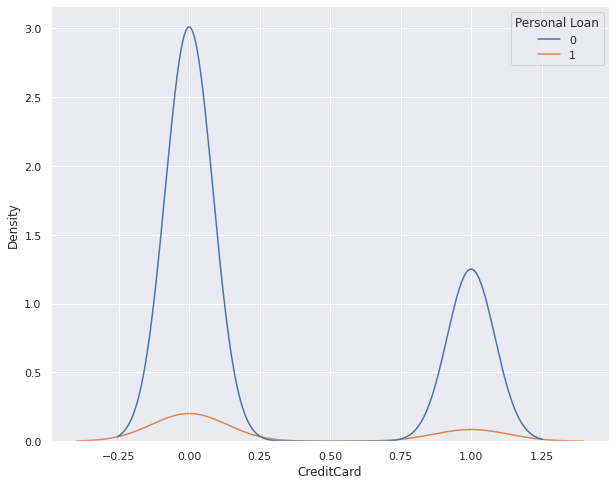

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=visa_df, x='CreditCard', hue='Personal Loan')

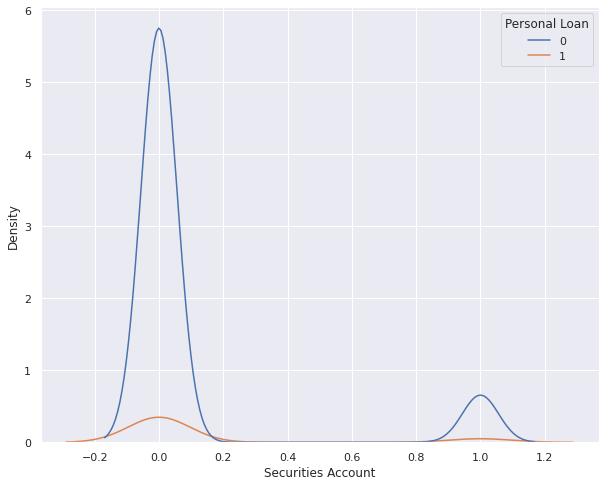

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=visa_df, x='Securities Account', hue='Personal Loan')

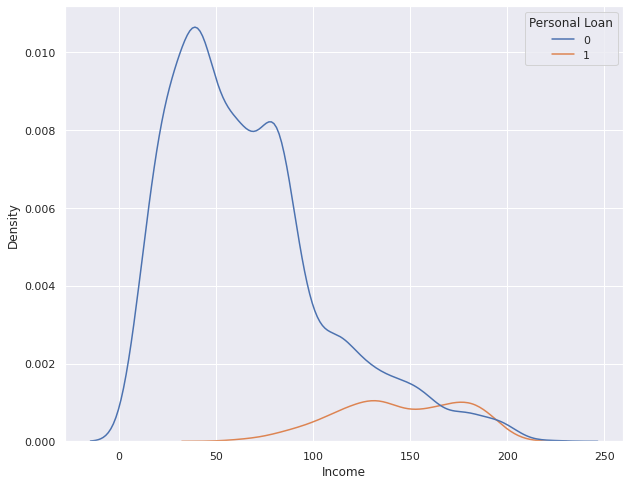

In [ ]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=visa_df, x='Income', hue='Personal Loan')

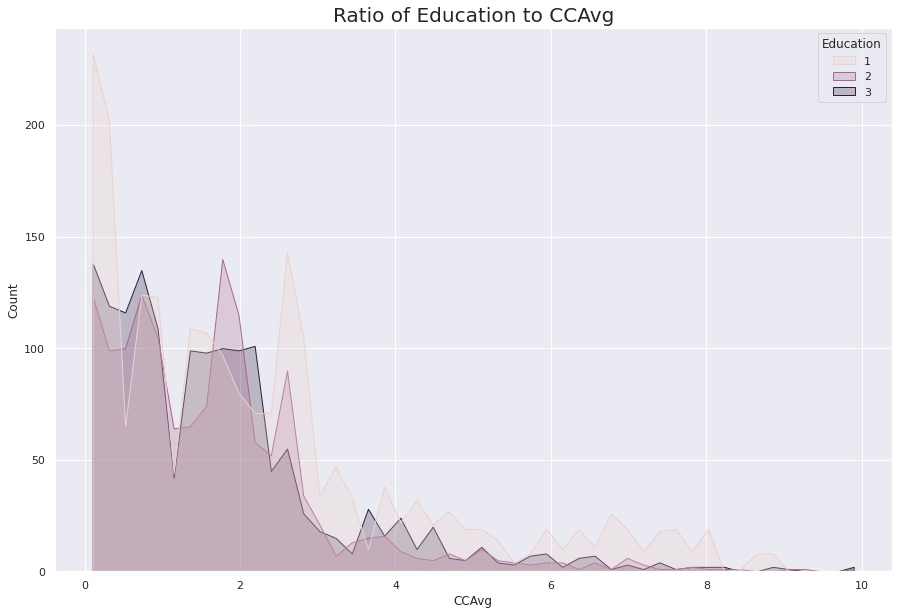

In [ ]:
def edu_ccavg():
    fig = plt.figure(figsize = (15, 10))
    plt.title('Ratio of Education to CCAvg', fontsize = 20)
    sns.histplot(data=visa_df, x='CCAvg', hue='Education', element='poly')


edu_ccavg()

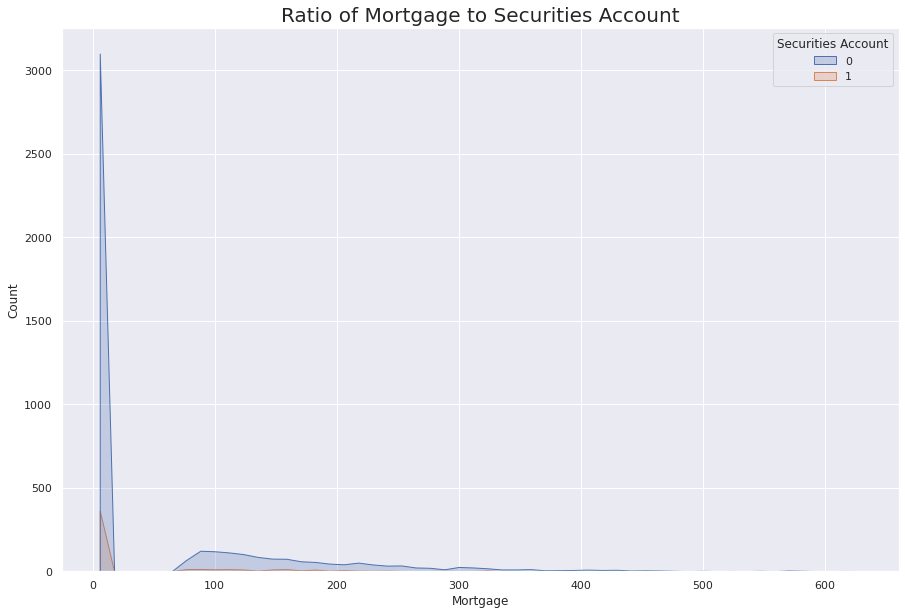

In [ ]:
def mortgage_secacc():
    fig = plt.figure(figsize = (15, 10))
    plt.title('Ratio of Mortgage to Securities Account', fontsize = 20)
    sns.histplot(data=visa_df, x='Mortgage', hue='Securities Account', element='poly')


mortgage_secacc()

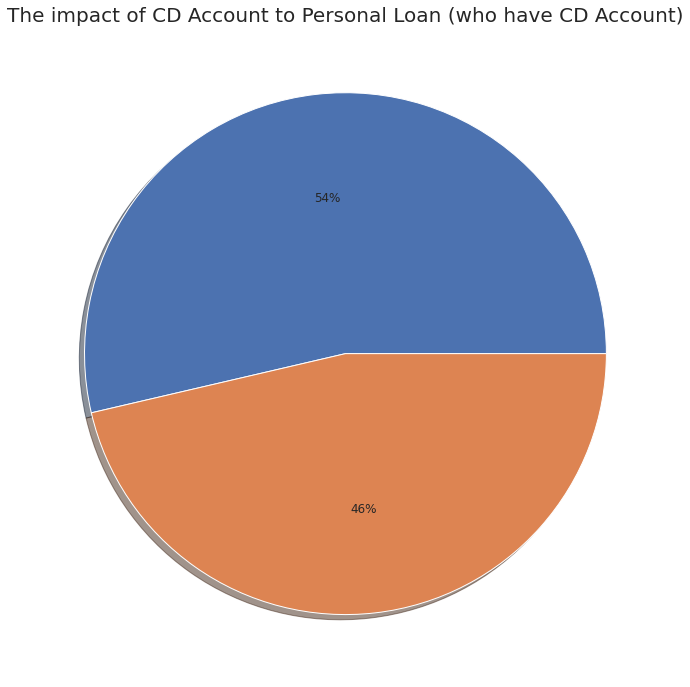

In [ ]:
def pl_according_to_cdacc():
    fg = pd.DataFrame()
    fg['CdAcc'] = visa_df.loc[(visa_df['CD Account'] == 1), ['Personal Loan']]
    plt.figure(figsize = (15, 12))
    plt.title('The impact of CD Account to Personal Loan (who have CD Account)', fontsize = 20)
    plt.pie(fg['CdAcc'].value_counts(), shadow=True, autopct='%.0f%%')
    plt.show()

pl_according_to_cdacc()

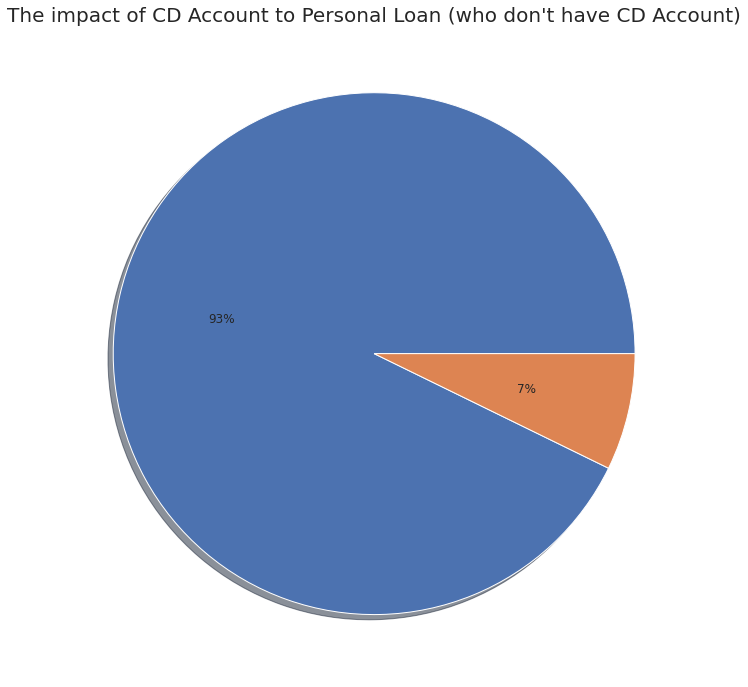

In [ ]:
def pl_according_to_cdacc():
    fg = pd.DataFrame()
    fg['CdAcc'] = visa_df.loc[(visa_df['CD Account'] == 0), ['Personal Loan']]
    plt.figure(figsize = (15, 12))
    plt.title("The impact of CD Account to Personal Loan (who don't have CD Account)", fontsize = 20)
    plt.pie(fg['CdAcc'].value_counts(), shadow=True, autopct='%.0f%%')
    plt.show()


pl_according_to_cdacc()

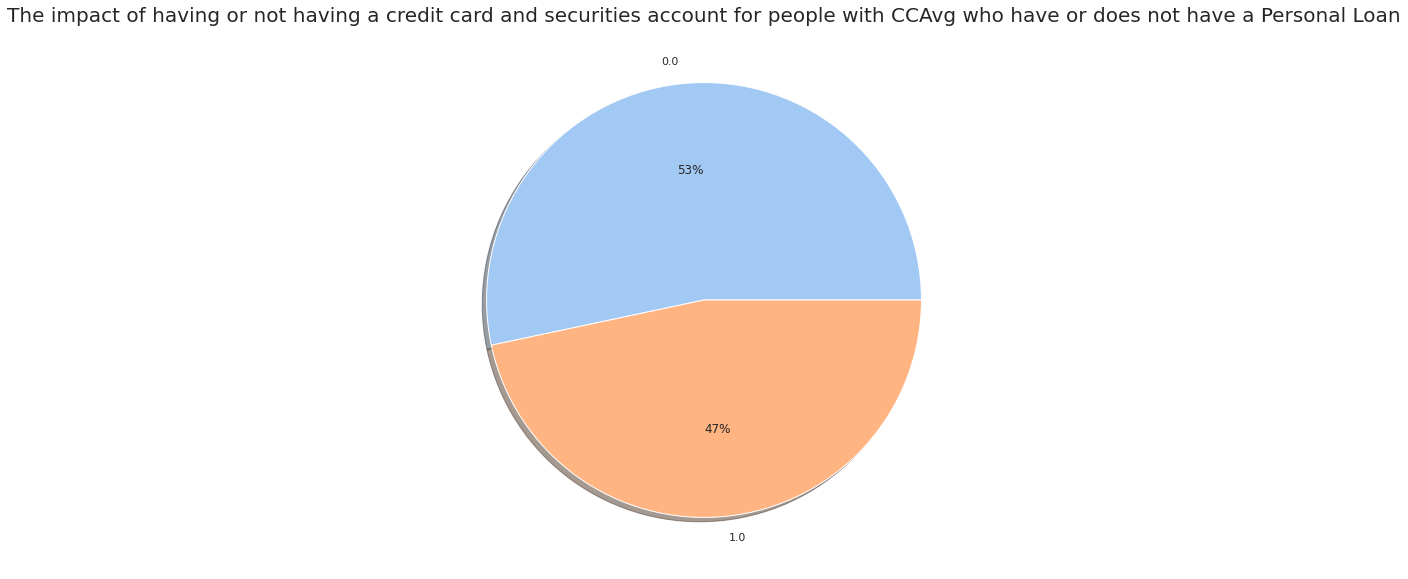

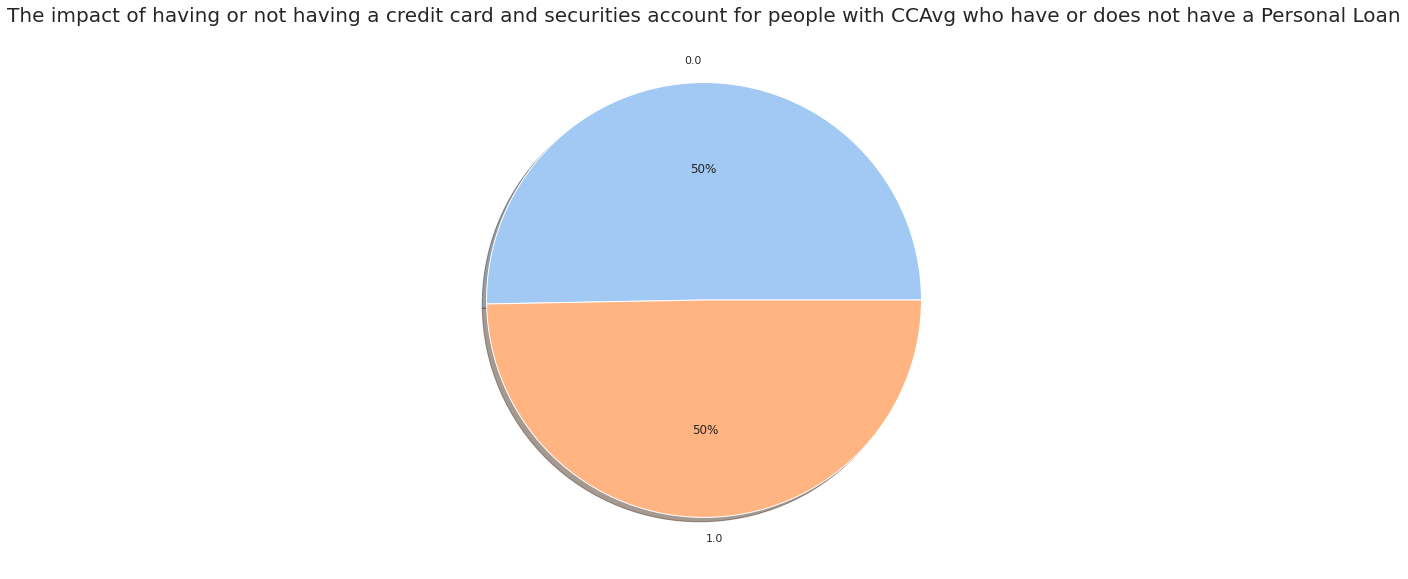

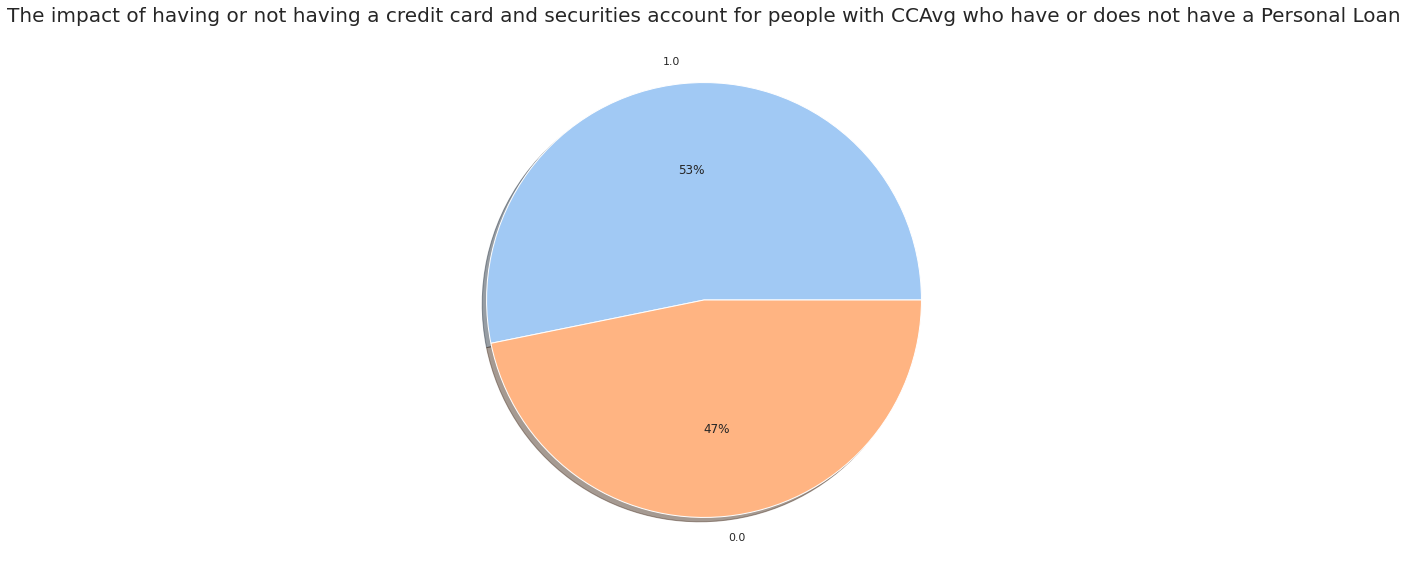

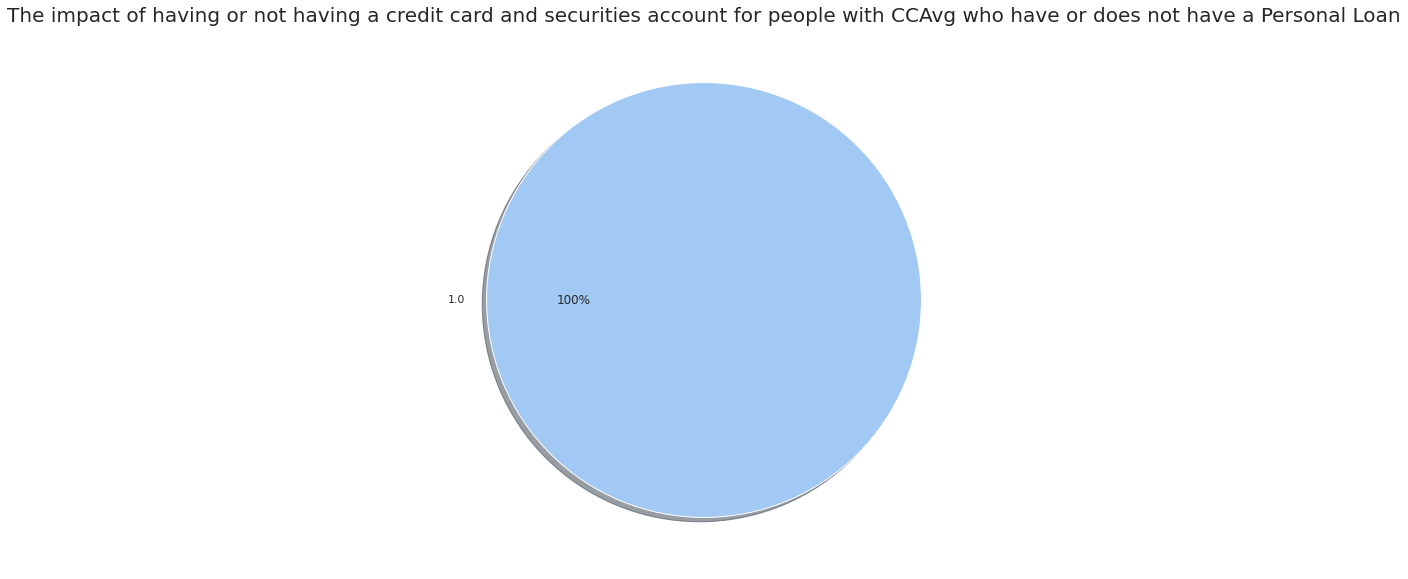

In [ ]:
def pl_according_to_secacc_credcd(dataset, sa, cc):
    most_popular_gen = dict(dataset.loc[(visa_df['Securities Account'] == sa) & (dataset['CreditCard'] == cc), ['Personal Loan', 'CCAvg']].nlargest(3, 'CCAvg').values)
    genres = list(most_popular_gen.keys())
    installs = list(most_popular_gen.values())
    colors = sns.color_palette('pastel')[0:len(genres)]
    fig = plt.figure(figsize = (15, 10))
    plt.title('The impact of having or not having a credit card and securities account for people with CCAvg who have or does not have a Personal Loan', fontsize = 20)
    plt.pie(installs, labels = genres, colors = colors, shadow=True, autopct='%.0f%%')
    plt.show()


pl_according_to_secacc_credcd(visa_df, 1, 1)
pl_according_to_secacc_credcd(visa_df, 1, 0)
pl_according_to_secacc_credcd(visa_df, 0, 1)
pl_according_to_secacc_credcd(visa_df, 0, 0)

In [ ]:
def locations_of_clients(col):
    nomi = pgeocode.Nominatim('us')
    edf = pd.DataFrame()
    edf['zipcode'] = visa_df['ZIP Code']
    edf['Latitude'] = (nomi.query_postal_code(edf['zipcode'].astype(str).tolist()).latitude)
    edf['Longitude'] = (nomi.query_postal_code(edf['zipcode'].astype(str).tolist()).longitude)
    edf[col] = visa_df[col]
    fig = px.density_mapbox(edf, lat='Latitude', lon='Longitude', z=col, radius=10, zoom=4, mapbox_style='open-street-map')
    print(edf.isnull().sum())
    print(edf)
    fig.show()



locations_of_clients('Income')

zipcode       0
Latitude     41
Longitude    41
Income        0
dtype: int64
      zipcode  Latitude  Longitude  Income
0       91107   34.1510  -118.0889      49
1       90089   33.7866  -118.2987      34
2       94720   37.8738  -122.2549      11
3       94112   37.7195  -122.4411     100
4       91330   34.2283  -118.5368      45
...       ...       ...        ...     ...
4995    92697   33.6485  -117.8387      40
4996    92037   32.8455  -117.2521      15
4997    93023   34.4451  -119.2565      24
4998    90034   34.0290  -118.4005      49
4999    92612   33.6607  -117.8264      83

[5000 rows x 4 columns]


In [ ]:
locations_of_clients('Age')

zipcode       0
Latitude     41
Longitude    41
Age           0
dtype: int64


In [ ]:
locations_of_clients('Education')

zipcode       0
Latitude     41
Longitude    41
Education     0
dtype: int64


In [ ]:
locations_of_clients('CCAvg')

zipcode       0
Latitude     41
Longitude    41
CCAvg         0
dtype: int64


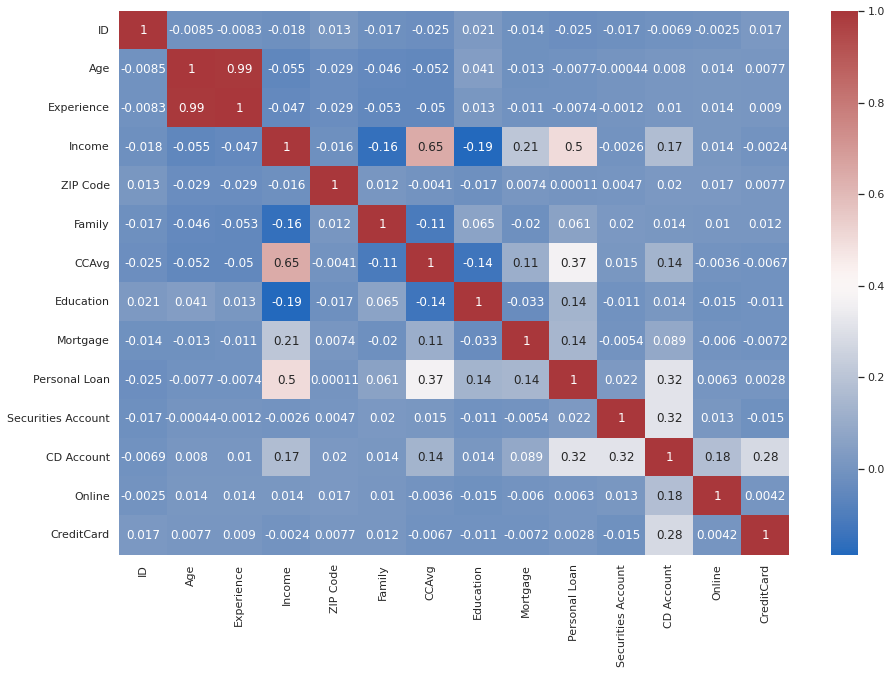

In [ ]:
def compute_correlations_matrix(dataset):
    corrMatrix = dataset.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()


compute_correlations_matrix(visa_df)

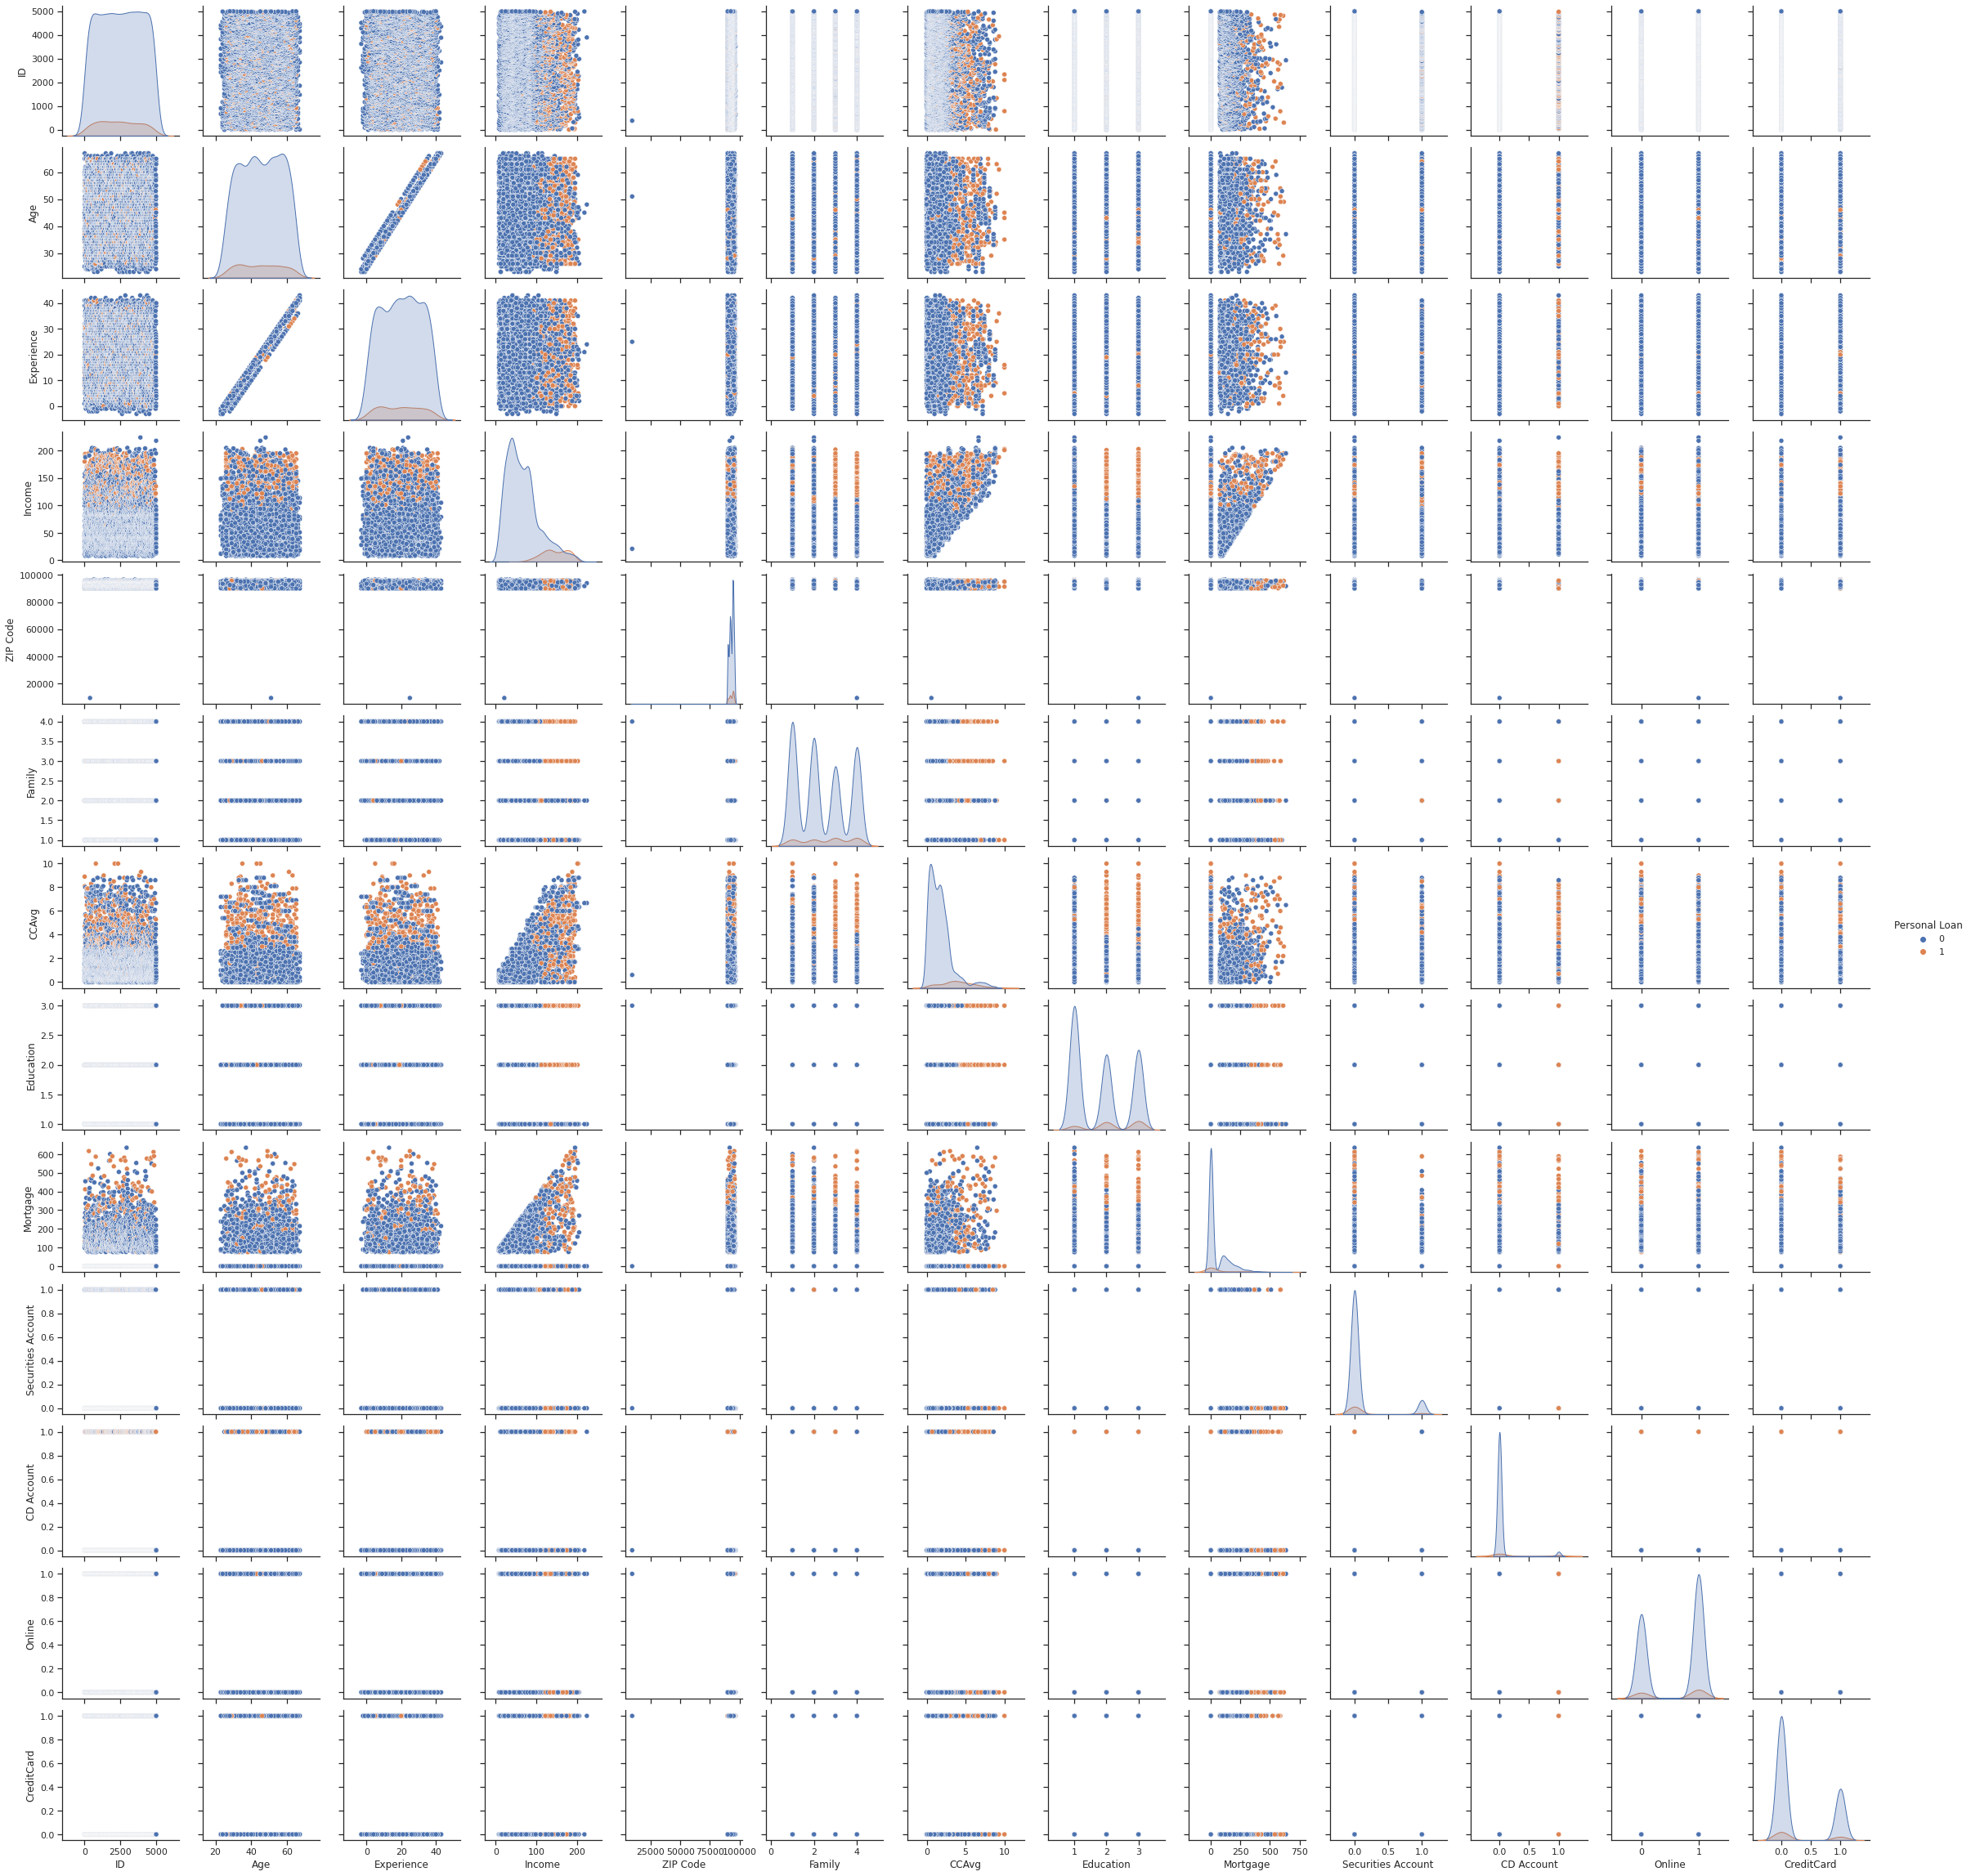

In [ ]:
def print_scatter_matrix():
    sns.set()
    sns.set_theme(style="ticks")
    sns.pairplot(visa_df, hue="Personal Loan")
    plt.show()


print_scatter_matrix()

In [ ]:
# let's make function that find highly correlated features

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # !We are interested in absolute coeff value
                colname = corr_matrix.columns[i] # Getting the name of the column
                col_corr.add(colname)
    return col_corr

need_to_remove = correlation(visa_df, 0.85)
print(need_to_remove)

{'Experience'}


In [ ]:
need_to_remove.remove('Experience')

# Machine Learning Part

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
X = visa_df.drop(columns=['ID', 'Personal Loan'], axis=1)
Y = visa_df['Personal Loan']
print(X)
print(Y)

      Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Securities Account  CD Account  Online  Credi

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
print(X.shape, X_train.shape, X_test.shape)
print(X_train)
print(Y_train)

(5000, 12) (4500, 12) (500, 12)
      Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
4855   58          32     130     94720       2   2.70          1         0   
2110   28           4     104     94301       3   2.50          1         0   
1281   39          15      52     92093       3   2.33          1         0   
2565   40          15      10     94708       2   0.00          3       102   
822    61          35      60     96091       3   1.40          3         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
1206   63          37     165     95035       4   5.10          3         0   
4073   51          27      19     92120       1   0.20          1         0   
3018   58          32      49     94005       1   1.40          1        99   
4834   49          23      70     94305       1   0.30          1       217   
1183   50          25      35     94105       3   1.70          2         0   

      Securities Ac

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
X_lg_train_pred = lg_model.predict(X_train)
print('Accuracy of LogReg.training data: ', accuracy_score(X_lg_train_pred, Y_train))

X_lg_test_pred = lg_model.predict(X_test)
print('Accuracy of LogReg.test data: ', accuracy_score(X_lg_test_pred, Y_test))

Accuracy of LogReg.training data:  0.9084444444444445
Accuracy of LogReg.test data:  0.902


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
X_cl_train_pred = classifier.predict(X_train)
print('Accuracy of Classifier.training data: ', accuracy_score(X_cl_train_pred, Y_train))

X_cl_test_pred = classifier.predict(X_test)
print('Accuracy of Classifier.test data: ', accuracy_score(X_cl_test_pred, Y_test))

Accuracy of Classifier.training data:  0.9104444444444444
Accuracy of Classifier.test data:  0.906


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
X_gnb_train_pred = gnb.predict(X_train)
print('Accuracy of GaussianNB.training data: ', accuracy_score(X_gnb_train_pred, Y_train))

X_gnb_test_pred = gnb.predict(X_test)
print('Accuracy of GaussianNB.test data: ', accuracy_score(X_gnb_test_pred, Y_test))

Accuracy of GaussianNB.training data:  0.8891111111111111
Accuracy of GaussianNB.test data:  0.89


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
X_knn_train_pred = knn.predict(X_train)
print('Accuracy of KNN.training data: ', accuracy_score(X_knn_train_pred, Y_train))

X_knn_test_pred = knn.predict(X_test)
print('Accuracy of KNN.test data: ', accuracy_score(X_knn_test_pred, Y_test))

Accuracy of KNN.training data:  0.9391111111111111
Accuracy of KNN.test data:  0.9


In [ ]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train, Y_train)
X_rf_train_pred = rf.predict(X_train)
print('Accuracy of RandomForest.training data: ', accuracy_score(X_rf_train_pred, Y_train))

X_rf_test_pred = rf.predict(X_test)
print('Accuracy of RandomForest.test data: ', accuracy_score(X_rf_test_pred, Y_test))

Accuracy of RandomForest.training data:  0.9997777777777778
Accuracy of RandomForest.test data:  0.974
